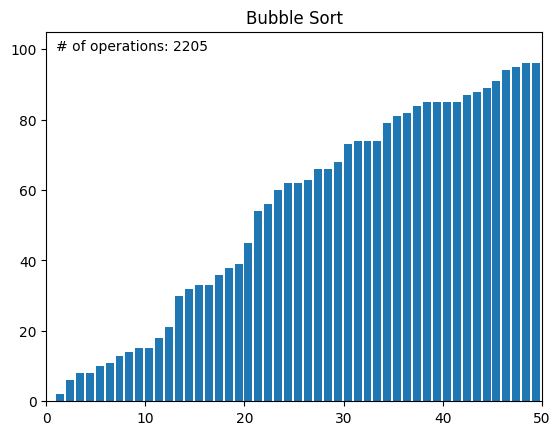

In [3]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def bubble_sort(arr):
    swapped = True
    while swapped:
        swapped = False
        for i in range(len(arr) - 1):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                swapped = True
            yield arr

def visualize_sort_and_save(fname = "sort_anim.mp4"):
    # データの初期化
    data = np.random.randint(0, 100, 50)
    sorter = bubble_sort(data)

    fig, ax = plt.subplots()
    ax.set_title("Bubble Sort")
    bar_rects = ax.bar(range(len(data)), data, align="edge")

    # 上限と下限を設定
    ax.set_xlim(0, len(data))
    ax.set_ylim(0, int(1.1*max(data)))

    text = ax.text(0.02, 0.95, "", transform=ax.transAxes)

    iteration = [0]
    def update_fig(data, rects, iteration):
        for rect, val in zip(rects, data):
            rect.set_height(val)
        iteration[0] += 1
        text.set_text(f"# of operations: {iteration[0]}")

    anim = animation.FuncAnimation(fig, func=update_fig, fargs=(bar_rects, iteration),
                                   frames=sorter, repeat=False, interval=15, save_count=90000)
    anim.save(fname, writer="ffmpeg", fps=60)

    plt.show()

visualize_sort_and_save("bublle_sort.mp4")
